# Project FIFA MoneyBall

## Table of Contents

[1. Project Explanation]{*Project-explanation}

- Project explanation
- Import of libraries

## Project explanation

## 2 Import of libaries

In [71]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder

import statsmodels.api as sm
from statsmodels.formula.api import ols


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import os

import warnings
warnings.filterwarnings('ignore')

## 3 Data exploration

**Creating a dataframe from the csv-file:**

In [2]:
data = pd.read_csv('fifa21_male2.csv')

**Displaying all columns of dataframe to get an overview:**

In [3]:
pd.set_option('display.max_columns', None)
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

**Checking out number of rows and columns of dataframe:**

In [4]:
data.shape

(17125, 107)

**Displaying unique values for object columns:**

In [5]:
for column in data.select_dtypes(object).columns:
    data[column].unique()

In [6]:
data['BP'].unique()

array(['LWB', 'CM', 'CAM', 'ST', 'RW', 'CB', 'CF', 'GK', 'CDM', 'RWB',
       'LB', 'LM', 'RM', 'RB', 'LW'], dtype=object)

In [7]:
pd.set_option('display.max_rows', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


**Table showing overview of columns and what has to be done:**

|	Category	|	Column names	|	Column type	|	Description	|	Action	|
|	:------------	|	:------------	|	:------------	|	:------------	|	:------------	|
|		|	ID	|	numerical	|		|	remove --> no use for analysis (only unique values)	|
|		|	Name	|	object	|		|	remove --> no use for analysis	|
|		|	Age	|	numerical	|	in years	|		|
|		|	OVA	|	numerical	|	overall rating	|		|
|		|	Nationality	|	object	|		|	many unique values for regression model - grouping or else remove	|
|		|	Club	|	object	|		|	many unique values for regression model - grouping or else remove	|
|		|	BOV	|	numerical	|	best overall	|		|
|		|	BP	|	object	|	best position : LWB, CM, CAM, ST, RW, CB, CF, GK, CDM, RWB, LB, LM, RM, RB, LW	|		|
|		|	Position	|	object	|	list of all positions the player has been playing 	|	too many unique values - remove 	|
|		|	Player Photo	|	object	|	link to player photo	|	remove	|
|		|	Club Logo	|	object	|	link to club logo	|	remove	|
|		|	Flag Photo	|	object	|	link to flag photo	|	remove	|
|		|	POT	|	numerical	|	potential	|		|
|		|	Team & Contract	|	object	|	same info as club + contract	|	remove 	|
|		|	Height	|	object	|	foot/inches	|	change to numerical format possible?	|
|		|	Weight	|	object	|	lbs	|	remove lbs --> change to numerical	|
|		|	foot	|	object	|	left / rigth	|		|
|		|	Growth	|	numerical	|		|		|
|		|	Joined	|	object	|		|	change to date format or remove	|
|		|	Loan Date End	|	object	|		|	remove (too many NaN-values)	|
|	TARGET COLUMN	|	Value	|	object	|	amount in EUR	|	needs to be changed to numerical to be of use	|
|		|	Wage	|	object	|	amount in EUR	|	needs to be changed to numerical to be of use	|
|		|	Release Clause	|	object	|	amount in EUR	|	needs to be changed to numerical to be of use	|
|		|	Contract	|	object	|	period (year ~ year) or single year	|	change to amount of years possible? otherwise can be removed	|
|	Attacking	|	Attacking	|	numerical	|		|		|
|	Attacking	|	Crossing	|	numerical	|		|		|
|	Attacking	|	Finishing	|	numerical	|		|		|
|	Attacking	|	Heading Accuracy	|	numerical	|		|		|
|	Attacking	|	Short Passing	|	numerical	|		|		|
|	Attacking	|	Volleys	|	numerical	|		|		|
|	Skill	|	Skill	|	numerical	|		|		|
|	Skill	|	Dribbling	|	numerical	|		|		|
|	Skill	|	Curve	|	numerical	|		|		|
|	Skill	|	FK Accuracy	|	numerical	|		|		|
|	Skill	|	Long Passing	|	numerical	|		|		|
|	Skill	|	Ball Control	|	numerical	|		|		|
|	Movement	|	Movement	|	numerical	|		|		|
|	Movement	|	Acceleration	|	numerical	|		|		|
|	Movement	|	Sprint Speed	|	numerical	|		|		|
|	Movement	|	Agility	|	numerical	|		|		|
|	Movement	|	Reactions	|	numerical	|		|		|
|	Movement	|	Balance	|	numerical	|		|		|
|	Power	|	Power	|	numerical	|		|		|
|	Power	|	Shot Power	|	numerical	|		|		|
|	Power	|	Jumping	|	numerical	|		|		|
|	Power	|	Stamina	|	numerical	|		|		|
|	Power	|	Strength	|	numerical	|		|		|
|	Power	|	Long Shots	|	numerical	|		|		|
|	Mentality	|	Mentality	|	numerical	|		|		|
|	Mentality	|	Aggression	|	numerical	|		|		|
|	Mentality	|	Interceptions	|	numerical	|		|		|
|	Mentality	|	Positioning	|	numerical	|		|		|
|	Mentality	|	Vision	|	numerical	|		|		|
|	Mentality	|	Penalties	|	numerical	|		|		|
|	Mentality	|	Composure	|	numerical	|		|		|
|	Defending	|	Defending	|	numerical	|		|		|
|	Defending	|	Marking	|	numerical	|		|		|
|	Defending	|	Standing Tackle	|	numerical	|		|		|
|	Defending	|	Sliding Tackle	|	numerical	|		|		|
|	Goalkeeping	|	Goalkeeping	|	numerical	|		|		|
|	Goalkeeping	|	GK Diving	|	numerical	|		|		|
|	Goalkeeping	|	GK Handling	|	numerical	|		|		|
|	Goalkeeping	|	GK Kicking	|	numerical	|		|		|
|	Goalkeeping	|	GK Positioning	|	numerical	|		|		|
|	Goalkeeping	|	GK Reflexes	|	numerical	|		|		|
|	Special	|	Total Stats	|	numerical	|		|		|
|	Special	|	Base Stats	|	numerical	|		|		|
|	Special	|	W/F	|	object	|	weak foot	|	remove star symbol and change to numerical	|
|	Special	|	SM	|	object	|	skill moves	|	remove star symbol and change to numerical	|
|	Special	|	A/W	|	object	|	attacking work rate : high, medium, low	|		|
|	Special	|	D/W	|	object	|	defense work rate : high, medium, low	|		|
|	Special	|	IR	|	object	|	international reputation	|	remove star symbol and change to numerical	|
|	Special	|	PAC	|	numerical	|		|		|
|	Special	|	SHO	|	numerical	|		|		|
|	Special	|	PAS	|	numerical	|		|		|
|	Special	|	DRI	|	numerical	|		|		|
|	Special	|	DEF	|	numerical	|		|		|
|	Special	|	PHY	|	numerical	|		|		|
|		|	Hits	|	object	|		|	change to numerical	|
|		|	LS	|	object	|	left strike	|	number + number : remove everything after '+' and change to numerical or remove columns completely?	|
|		|	ST	|	object	|	striker	|	"	|
|		|	RS	|	object	|	right strike	|	"	|
|		|	LW	|	object	|	left winger	|	"	|
|		|	LF	|	object	|	left forward	|	"	|
|		|	CF	|	object	|	center forward	|	"	|
|		|	RF	|	object	|	right forward	|	"	|
|		|	RW	|	object	|	right winger	|	"	|
|		|	LAM	|	object	|	left attacking mf	|	"	|
|		|	CAM	|	object	|	center attacking mf	|	"	|
|		|	RAM	|	object	|	right attacking mf	|	"	|
|		|	LM	|	object	|	left mf	|	"	|
|		|	LCM	|	object	|	left center mf	|	"	|
|		|	CM	|	object	|	center mf	|	"	|
|		|	RCM	|	object	|	right center mf	|	"	|
|		|	RM	|	object	|	right mf	|	"	|
|		|	LWB	|	object	|	left wingback	|	"	|
|		|	LDM	|	object	|	left defense mf	|	"	|
|		|	CDM	|	object	|	center defense mf	|	"	|
|		|	RDM	|	object	|	right defense mf	|	"	|
|		|	RWB	|	object	|	right wingback	|	"	|
|		|	LB	|	object	|	left back	|	"	|
|		|	LCB	|	object	|	left center back	|	"	|
|		|	CB	|	object	|	center back	|	"	|
|		|	RCB	|	object	|	right center back	|	"	|
|		|	RB	|	object	|	right back	|	"	|
|		|	GK	|	object	|	goalkeeper	|	"	|
|		|	Gender	|	object	|	all Male	|	remove (no use as information is the same for all rows)	|
||||||

**Showing basic statistics for all numerical columns:**

In [8]:
data.describe().apply(lambda x: round(x,2))

ID       Age       OVA       BOV       POT    Growth  Attacking  \
count   17125.00  17125.00  17125.00  17125.00  17125.00  17125.00   17125.00   
mean   219388.72     25.27     66.97     67.90     72.49      5.52     258.54   
std     37499.20      4.94      6.86      6.64      5.77      5.79      72.26   
min         2.00     16.00     38.00     42.00     47.00     -1.00      33.00   
25%    204082.00     21.00     62.00     64.00     69.00      0.00     232.00   
50%    228961.00     25.00     67.00     68.00     72.00      4.00     271.00   
75%    243911.00     29.00     72.00     72.00     76.00      9.00     306.00   
max    259105.00     53.00     93.00     93.00     95.00     26.00     437.00   

       Crossing  Finishing  Heading Accuracy  Short Passing   Volleys  \
count  17125.00   17125.00          17125.00       17125.00  17067.00   
mean      51.62      47.96             53.60          60.51     45.01   
std       17.88      19.39             16.95          13.96     17.73   
min        6.00       3.00              5.00           7.00      4.00   
25%       41.00      33.00             46.00          56.00     32.00   
50%       56.00      52.00             57.00          63.00     46.00   
75%       65.00      64.00             65.00          69.00     59.00   
max       94.00      95.00             93.00          94.00     90.00   

          Skill  Dribbling     Curve  FK Accuracy  Long Passing  Ball Control  \
count  17125.00   17125.00  17067.00     17125.00      17125.00      17125.00   
mean     266.61      57.85     49.57        44.39         54.32         60.64   
std       76.81      18.05     18.19        17.50         14.86         15.87   
min       43.00       5.00      4.00         5.00          9.00          5.00   
25%      232.00      53.00     37.00        32.00         45.00         57.00   
50%      279.00      63.00     51.00        43.00         57.00         64.00   
75%      319.00      70.00     64.00        58.00         65.00         70.00   
max      470.00      96.00     94.00        94.00         93.00         96.00   

       Movement  Acceleration  Sprint Speed   Agility  Reactions   Balance  \
count  17125.00      17125.00      17125.00  17067.00   17125.00  17067.00   
mean     322.69         65.45         65.44     64.60      62.92     64.72   
std       54.93         14.66         14.44     14.37       9.04     14.03   
min      113.00         12.00         11.00     14.00      24.00     17.00   
25%      294.00         58.00         59.00     57.00      57.00     57.00   
50%      331.00         68.00         68.00     67.00      63.00     67.00   
75%      360.00         75.00         75.00     75.00      69.00     75.00   
max      464.00         97.00         96.00     96.00      96.00     97.00   

          Power  Shot Power   Jumping   Stamina  Strength  Long Shots  \
count  17125.00    17125.00  17067.00  17125.00  17125.00    17125.00   
mean     302.41       59.71     65.17     63.31     65.31       49.14   
std       49.38       13.42     11.92     15.31     12.63       19.04   
min      128.00       12.00     22.00     11.00     16.00        4.00   
25%      272.00       50.00     58.00     56.00     58.00       35.00   
50%      308.00       61.00     66.00     66.00     67.00       53.00   
75%      339.00       70.00     73.00     73.00     74.00       64.00   
max      444.00       95.00     95.00     97.00     97.00       94.00   

       Mentality  Aggression  Interceptions  Positioning    Vision  Penalties  \
count   17125.00    17125.00       17118.00     17118.00  17067.00   17125.00   
mean      261.92       57.00          47.09        52.37     55.44      50.25   
std        62.91       17.02          20.85        19.09     13.73      15.70   
min        50.00        9.00           4.00         2.00     10.00       7.00   
25%       235.00       45.00          26.00        43.00     47.00      40.00   
50%       269.00       60.00          53.00      

## Data cleaning and wrangling

**Changing the column header names (lower letter and no spaces):**

In [9]:
data.columns = [col.lower().replace(' ','_') for col in data.columns]
data.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

**Removing duplicate rows in dataframe:**

In [10]:
data = data.drop_duplicates()
data.shape

(17125, 107)

--> the number of rows has not changed = there were/are no duplicate rows in the dataframe

**Extracting only year from column 'joined':**

In [11]:
data['joined'] = pd.to_datetime(data['joined'])
data['joined_year'] = data['joined'].dt.strftime('%Y')

**Creating new column with amount of years for current contract:**

data['contract_1'] = data['contract'].str.split(' ~ ')
data['contract_start'] = data['contract_1'].apply(lambda x: x[0])
data['contract_end'] = data['contract_1'].apply(lambda x: x[1])

#data['year_contract'] = float(data['contract_end']-data['contract_start'])
data['contract_start']

**Changing column types to numerical:**

Removing unnecessary symbols and strings and converting values to float:

In [12]:
data['height'] = data['height'].apply(lambda x: str(x).replace("'", '.'))
data['height'] = data['height'].apply(lambda x: float(str(x).replace('"', '')))

data['weight'] = data['weight'].apply(lambda x: float(str(x).replace('lbs', '')))

data['w/f'] = data['w/f'].apply(lambda x: float(str(x).replace('★', '')))
data['sm'] = data['sm'].apply(lambda x: float(str(x).replace('★', '')))
data['ir'] = data['ir'].apply(lambda x: float(str(x).replace('★', '')))

data['hits'] = data['hits'].apply(lambda x: str(x).replace('.', ''))
data['hits'] = data['hits'].apply(lambda x: float(str(x).replace('K', '00')))

Changing measurements: height to meters and weigth to kilogramms:

In [13]:
data['height'] = data['height'].apply(lambda x: x*0.3048)
data['weight'] = data['weight'].apply(lambda x: x*0.453)

**Changing money columns (€):**<br>
1. Creating dummy columns to store necessary multipliers

In [14]:
def multiplier(x):
    if x.endswith('K'):
        return 1000
    elif x.endswith('M'):
        return 1000000
    else:
        return 1

data['value_multiplier'] = data['value'].apply(multiplier)
data['wage_multiplier'] = data['wage'].apply(multiplier)
data['release_clause_multiplier'] = data['release_clause'].apply(multiplier)

2. Removing strings from columns and changing it to numerical columns:

In [15]:
data['value'] = data['value'].apply(lambda x: float(str(x).replace('€', '').replace('K', '').replace('M', '')))
data['wage'] = data['wage'].apply(lambda x: float(str(x).replace('€', '').replace('K', '').replace('M', '')))
data['release_clause'] = data['release_clause'].apply(lambda x: float(str(x).replace('€', '').replace('K', '').replace('M', '')))

3. Multiplying columns with dummy multiplier columns:

In [16]:
data['value'] = (data['value']*data['value_multiplier'])/1000000
data['wage'] = (data['wage']*data['wage_multiplier'])/1000
data['release_clause'] = (data['release_clause']*data['release_clause_multiplier'])/1000000

data = data.rename(columns={'value':'value_M', 'wage':'wage_K', 'release_clause': 'release_clause_M'})

**Checking for rows with a high percentage of NaN-values:**

In [17]:
null_rows = data.isnull().sum(axis = 1).apply(lambda y: y/107).sort_values(ascending = False)
null_rows[:10]

1495    0.149533
546     0.149533
130     0.149533
42      0.149533
125     0.149533
96      0.149533
1148    0.149533
941     0.140187
623     0.140187
1045    0.140187
dtype: float64

--> no need to delete any rows as percentage of NaN-values is max 14%

**Checking for columns with a high percentage of NaN-values:**

In [18]:
null_col = data.isnull().sum().apply(lambda y: y/17125).sort_values(ascending=False)
null_col[:20]

loan_date_end     0.946861
composure         0.024701
position          0.024117
a/w               0.005197
d/w               0.005197
joined            0.003387
balance           0.003387
vision            0.003387
volleys           0.003387
jumping           0.003387
sliding_tackle    0.003387
agility           0.003387
joined_year       0.003387
curve             0.003387
club_logo         0.001343
club              0.001343
positioning       0.000409
interceptions     0.000409
def               0.000000
ls                0.000000
dtype: float64

--> column loan_end_date should be removed as percentage of NaN-values is above 90%

**Checking amount of NaN-values per column:** <br>
(creating dataframe displaying only columns with have NaN-values + how many rows with NaN-values there are)

In [19]:
pd.set_option("max_rows", None)

nan = data.isna().sum().sort_values(ascending=False)
nan_values = pd.DataFrame(data=nan).replace(0, np.nan).dropna()
nan_values

0
loan_date_end   16215.0
composure         423.0
position          413.0
a/w                89.0
d/w                89.0
joined             58.0
balance            58.0
vision             58.0
volleys            58.0
jumping            58.0
sliding_tackle     58.0
agility            58.0
joined_year        58.0
curve              58.0
club_logo          23.0
club               23.0
positioning         7.0
interceptions       7.0

### How to proceed with columns containing NaN-values?

|	Column	|	Amount of NaN-values	|	Action which will be taken	|	Coumn type	|
|:-----------|:---------------------------|:-------------------------------|:---------------|
|	loan_date_end	|	16215.0	|	drop column, too many NaN-values	|	date	|
|	composure	|	423.0	|	replace by mean/median	|	numerical column	|
|	position	|	413.0	|	replace by mode (most occuring value)	|	categorical column 	|
|	d/w	|	89.0	|	replace by mode (most occuring value)	|	categorical column 	|
|	a/w	|	89.0	|	replace by mode (most occuring value)	|	categorical column 	|
|	balance	|	58.0	|	replace by mean/median	|	numerical column	|
|	joined	|	58.0	|	will be dropped anyways	|	date	|
|	agility	|	58.0	|	replace by mean/median	|	numerical column	|
|	vision	|	58.0	|	replace by mean/median	|	numerical column	|
|	jumping	|	58.0	|	replace by mean/median	|	numerical column	|
|	volleys	|	58.0	|	replace by mean/median	|	numerical column	|
|	sliding_tackle	|	58.0	|	replace by mean/median	|	numerical column	|
|	curve	|	58.0	|	replace by mean/median	|	numerical column	|
|	club_logo	|	23.0	|	will be dropped anyways	|	categorical column 	|
|	club	|	23.0	|	replace by mode (most occuring value)	|	categorical column 	|
|	positioning	|	7.0	|	replace by mean/median	|	numerical column	|
|	interceptions	|	7.0	|	replace by mean/median	|	numerical column	|
|||||

**Writing functions to replace NaN-values:**

In [20]:
for column in data.select_dtypes(object).columns:
    data[column] = data[column].fillna(data[column].mode())

In [21]:
for column in data.select_dtypes(np.number).columns:
    data[column] = data[column].fillna(data[column].median())

In [22]:
pd.set_option("max_rows", 20)
pd.set_option("min_rows", 20)

data.isna().sum().sort_values(ascending=False)

loan_date_end                16214
position                       413
d/w                             89
a/w                             89
joined                          58
joined_year                     58
club                            23
club_logo                       23
st                               0
ls                               0
                             ...  
power                            0
balance                          0
reactions                        0
agility                          0
sprint_speed                     0
acceleration                     0
movement                         0
ball_control                     0
long_passing                     0
release_clause_multiplier        0
Length: 111, dtype: int64

--> functions didn't work for: club, d/w, a/w: checking for most occuring values manually <br>
--> no need to take care of other columns as these will be dropped anyways ??

In [23]:
print(data['joined_year'].value_counts())
print(data['club'].value_counts())
print(data['d/w'].value_counts())
print(data['a/w'].value_counts())

2019    4760
2020    4021
2018    3103
2017    1957
2016    1122
2015     690
2014     457
2013     302
2012     196
2011     153
        ... 
2002       6
2001       3
1999       2
1993       2
2000       2
1990       1
1996       1
1992       1
1995       1
1991       1
Name: joined_year, Length: 29, dtype: int64
Bolton Wanderers               45
Manchester United              45
Chelsea                        45
AS Monaco                      43
Arsenal                        43
Everton                        43
Wolverhampton Wanderers        43
Aston Villa                    43
Sunderland                     43
Inter                          42
                               ..
Palermo                         1
US Quevilly Rouen Métropole     1
Lierse SK                       1
CF Rayo Majadahonda             1
San Martin de Tucumán           1
SC Beira Mar                    1
Vitória                         1
Osmanlıspor                     1
Scotland                        1
FC 

Replacing NaN-values for d/w and a/w with 'Medium': <br>
Replacing NaN-values for club with 'Unknown' as no club stand out in particular:

In [24]:
data['d/w'] = data['d/w'].fillna('Medium')
data['a/w'] = data['a/w'].fillna('Medium')
data['club'] = data['club'].fillna('Unknown')
data['joined_year'] = data['joined_year'].fillna(2019)

**Dropping unnecessary columns:** 
- id (only unique values which are not relevant for regression model)
- name (not relevant for regression model)
- position (remove as important information is given in pb)
- player_photo + club_logo + flag_photo (only contain links)
- team_&_contract (double information)
- joined (date column cannot be used for regression + new column with extracted year was created already)
- loan_date_end (too many NaN-values)
- contract () ??
- position columns: ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb, gk (remove all to reduce amount of columns as information is not important)
- gender (not relevant as gender is the same for all rows)
- dummy multiplier columns: value_multiplier, wage_multiplier, release_clause_multiplier (not relevant for regression model)

In [25]:
data = data.drop(['id',  'name', 'position', 'player_photo', 'club_logo', 'flag_photo', 'team_&_contract', 'joined', 'loan_date_end', 'contract',
                  'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 
                  'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender', 'value_multiplier', 'wage_multiplier', 'release_clause_multiplier'], axis=1)

In [26]:
data.shape

(17125, 70)

## Questions and Visualization

**1. Question: rankings of positions and value/wage/release clause**

In [27]:
bp_value = data.groupby('bp')['value_M', 'wage_K', 'release_clause_M'].mean().sort_values(by='value_M', ascending=False).reset_index()

bp_value['value_rank'] = bp_value['value_M'].rank(ascending=False)
bp_value['wage_rank'] = bp_value['wage_K'].rank(ascending=False)
bp_value['release_clause_rank'] = bp_value['release_clause_M'].rank(ascending=False)

bp_value

bp   value_M     wage_K  release_clause_M  value_rank  wage_rank  \
0    CF  5.453315  22.498315          9.420281         1.0        1.0   
1    LW  4.048158  16.255502          7.206837         2.0        2.0   
2    CM  3.678010  15.094848          6.630590         3.0        4.0   
3    RW  3.373632  15.370061          5.842240         4.0        3.0   
4   CAM  3.107966  11.060463          5.532180         5.0        6.0   
5   CDM  2.834677  11.700040          5.133116         6.0        5.0   
6    LM  2.669776   9.466708          4.690827         7.0       13.0   
7   RWB  2.569544  10.630159          4.471405         8.0        7.0   
8   LWB  2.423929  10.043651          4.309710         9.0       11.0   
9    RB  2.412998  10.397483          4.357483        10.0        8.0   
10   ST  2.386239  10.239192          4.191755        11.0        9.0   
11   LB  2.302367   9.766287          4.153092        12.0       12.0   
12   GK  2.176885   8.377570          3.915465        13.0       14.0   
13   CB  2.136062  10.173954          3.840390        14.0       10.0   
14   RM  2.109263   7.770905          3.679407        15.0       15.0   

    release_clause_rank  
0                   1.0  
1                   2.0  
2                   3.0  
3                   4.0  
4                   5.0  
5                   6.0  
6                   7.0  
7                   8.0  
8                  10.0  
9                   9.0  
10                 11.0  
11                 12.0  
12                 13.0  
13                 14.0  
14                 15.0

**2. Question: left VS right foot**

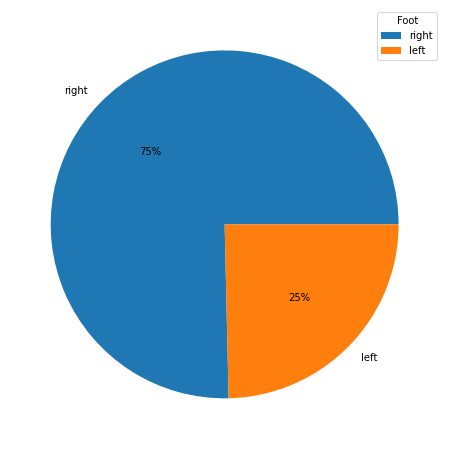

In [28]:
my_labels = ['right', 'left']

plt.figure(figsize=(8,8))

plt.pie(data['foot'].value_counts(), labels=my_labels, autopct='%1.0f%%')
plt.legend(title="Foot")
plt.show()

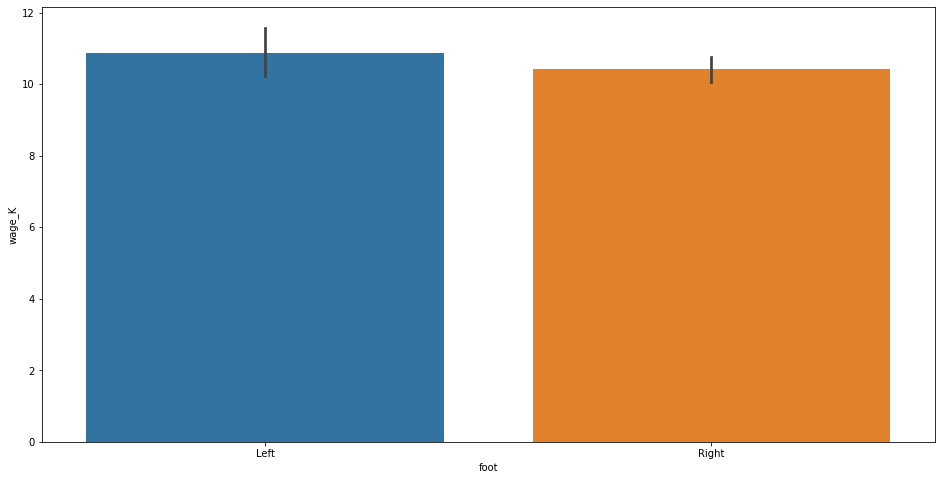

In [29]:
wage_foot = data.groupby('foot')['wage_K'].mean().reset_index()

plt.figure(figsize=(16,8))

sns.barplot(x='foot', y='wage_K', data=data)
plt.show()

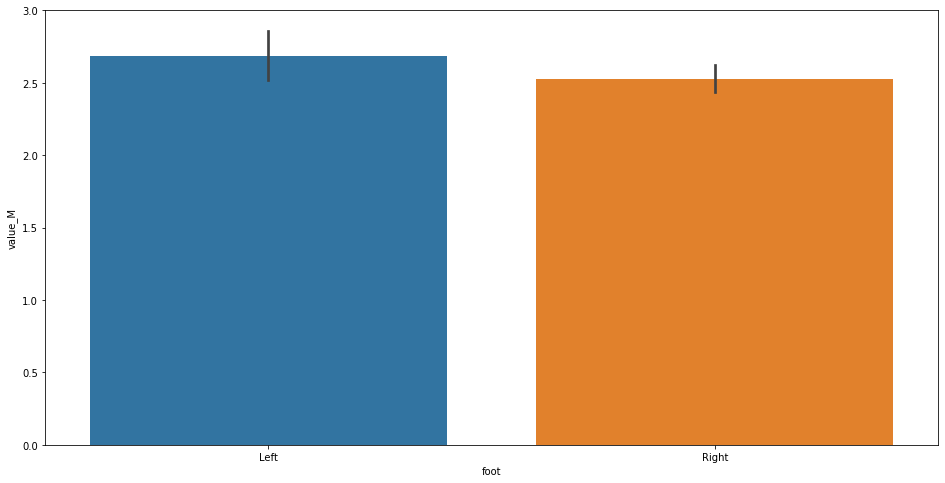

In [30]:
value_foot = data.groupby('foot')['value_M'].mean().reset_index()

plt.figure(figsize=(16,8))

sns.barplot(x='foot', y='value_M', data=data)
plt.show()

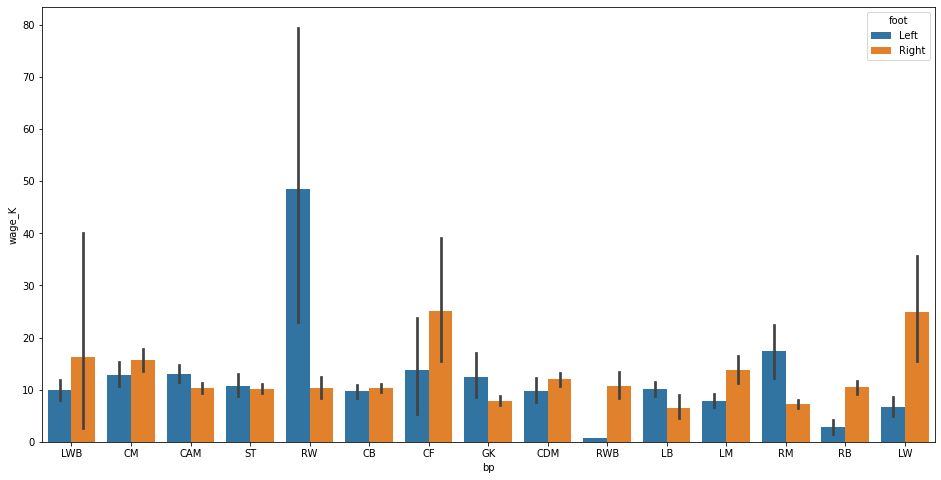

In [31]:
plt.figure(figsize=(16,8))

sns.barplot(x='bp', y='wage_K', hue='foot', data=data)
plt.show()

**3. Question: Comparison of age and wage**

In [32]:
age_wage = data.groupby('age')['wage_K'].mean().reset_index()
age_wage

age     wage_K
0    16   0.754444
1    17   0.842187
2    18   1.448414
3    19   2.668676
4    20   4.706773
5    21   5.234807
6    22   7.605408
7    23   9.054323
8    24  10.154686
9    25  11.883634
..  ...        ...
20   36   8.328448
21   37  10.926126
22   38   9.286301
23   39   9.503846
24   40   7.909524
25   41   3.068750
26   42  13.500000
27   43   2.750000
28   47   0.700000
29   53   0.850000

[30 rows x 2 columns]

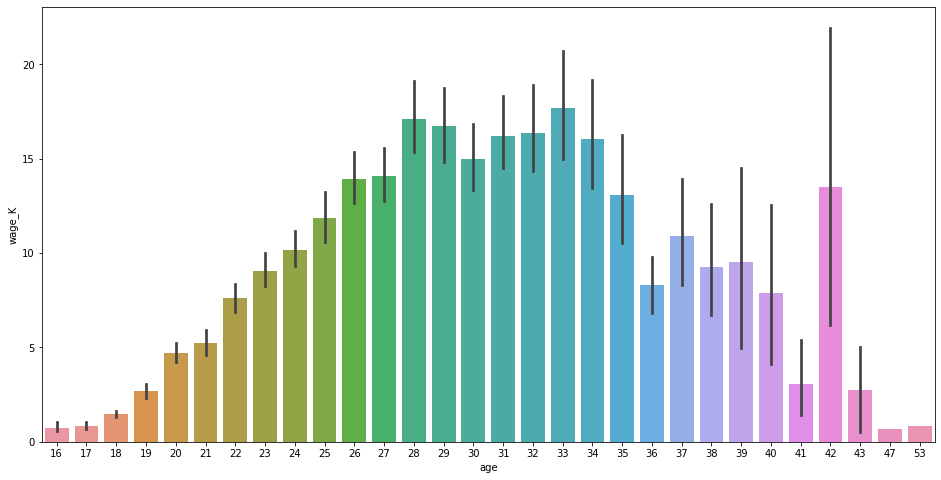

In [33]:
plt.figure(figsize=(16,8))

sns.barplot(x='age', y='wage_K', data=data)
plt.show()

Other interesting questions:

In [34]:
club_ova = pd.DataFrame(data.groupby('club')['ova', 'pot'].mean().sort_values(by='ova', ascending=False))
club_ova

ova        pot
club                                              
Netherlands                   84.500000  88.250000
Spain                         82.000000  82.000000
FC Bayern München             81.461538  85.461538
Palermo                       81.000000  81.000000
Portugal                      80.833333  80.833333
Brazil                        79.692308  79.692308
Real Madrid                   79.060606  84.848485
Argentina                     79.000000  81.000000
Belgium                       79.000000  79.000000
Uruguay                       78.347826  78.347826
...                                 ...        ...
Longford Town                 54.000000  56.000000
Jaguares de Chiapas           53.500000  62.000000
Finn Harps                    53.384615  59.538462
UCD AFC                       52.250000  66.375000
Inverness Caledonian Thistle  52.000000  60.000000
Halmstads BK                  51.000000  70.000000
Bray Wanderers                50.333333  64.333333
Al Orobah                     50.000000  52.000000
Cesena                        49.000000  65.000000
Wexford Youths                45.000000  56.000000

[918 rows x 2 columns]

The 10 clubs with the highest mean value of their players:

In [35]:
club_value = data.groupby('club')['value_M'].mean().sort_values(ascending=False).reset_index()
club_value = club_value[club_value.value_M>13.4]
club_value.head(10)

club    value_M
0    FC Bayern München  24.801923
1          Real Madrid  23.203939
2            Liverpool  21.323375
3      Manchester City  18.359756
4  Paris Saint-Germain  17.990972
5         FC Barcelona  17.417073
6      Atlético Madrid  15.730128
7             Juventus  15.331875
8    Borussia Dortmund  13.897297
9    Tottenham Hotspur  13.881548

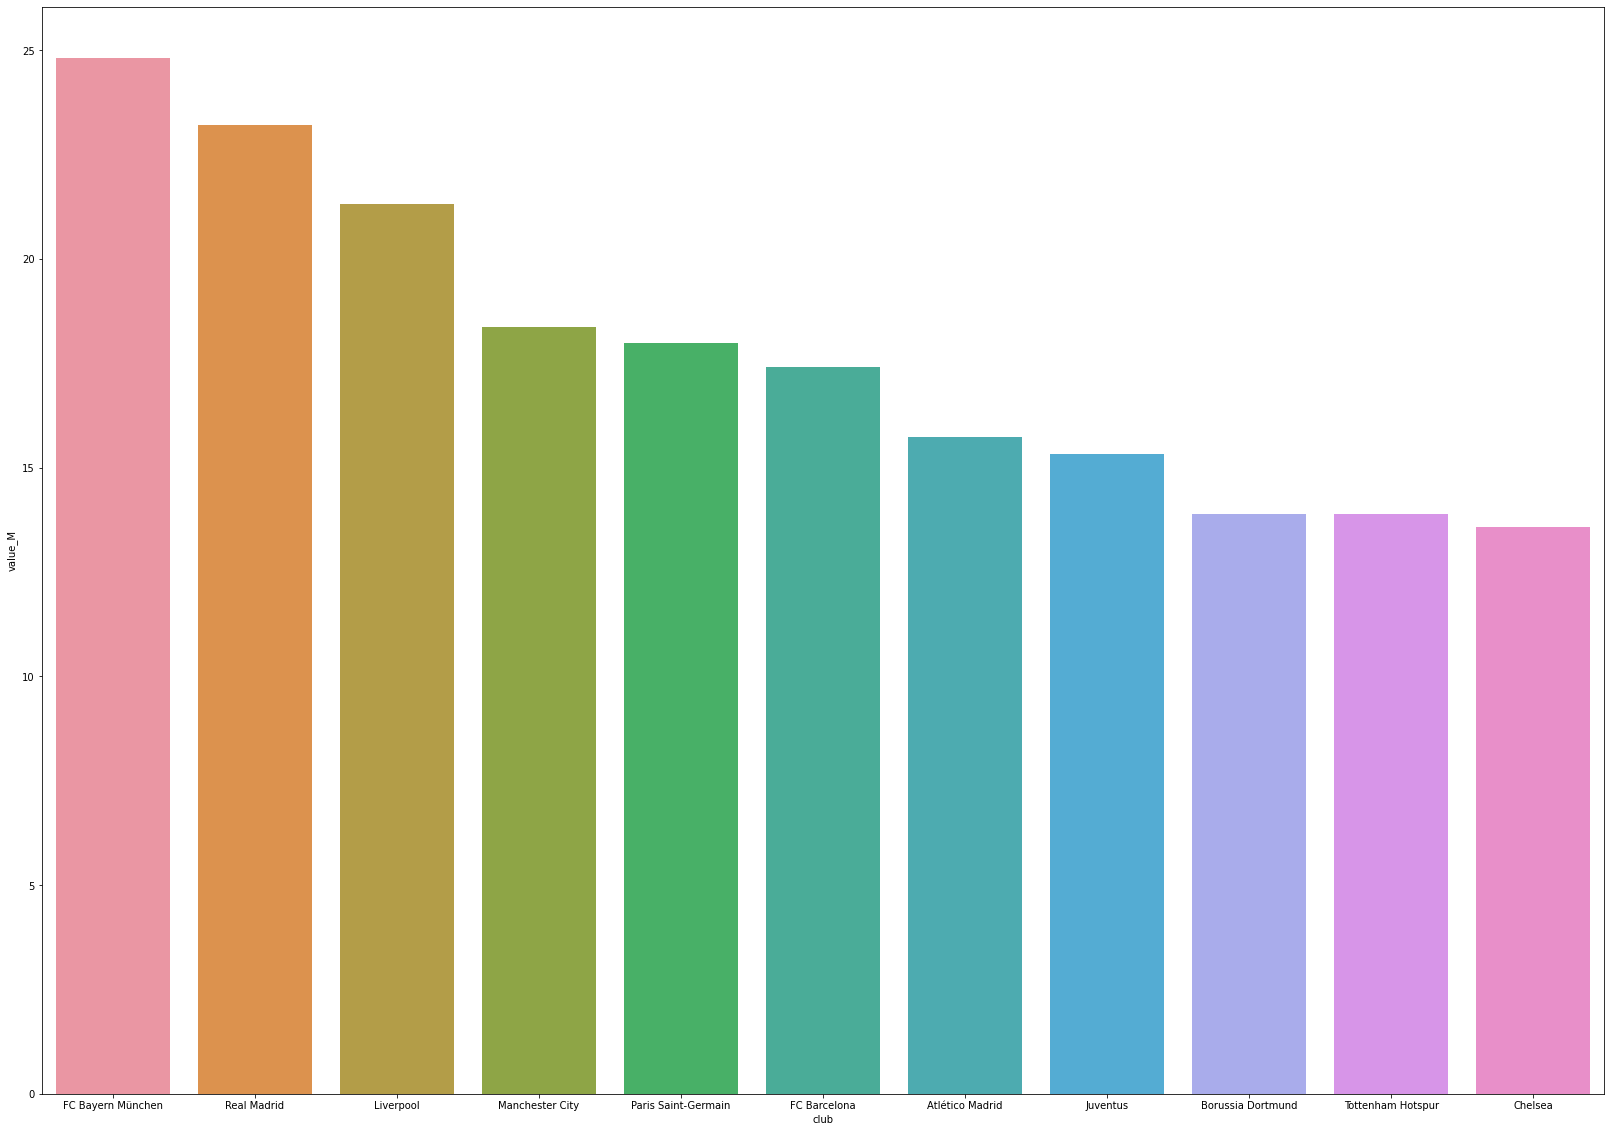

In [36]:
plt.figure(figsize=(28,20))

'''
Germany = 
Spain
England
Italy
'''

sns.barplot(x='club', y='value_M', data=club_value)
plt.show()

## Linear Regression Model

### Pre-processing data for the linear regression model:

Checking out distribution of numerical columns:

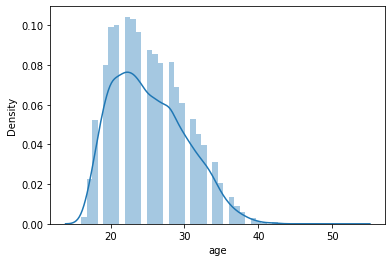

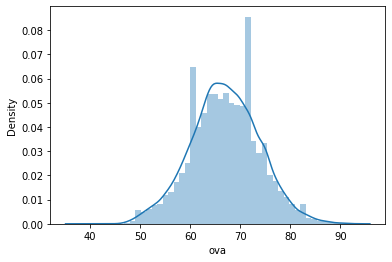

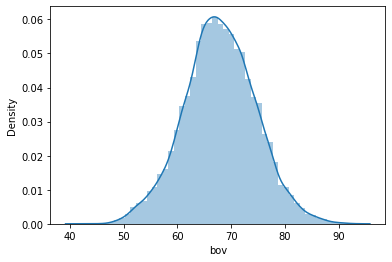

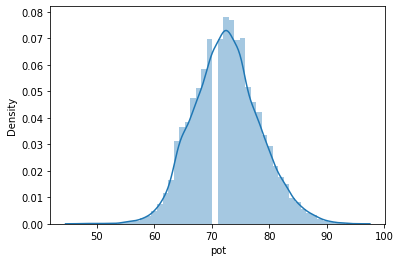

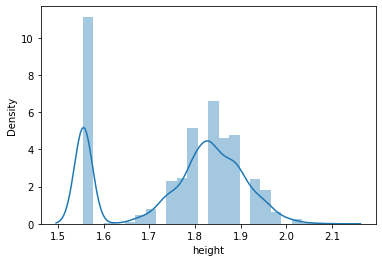

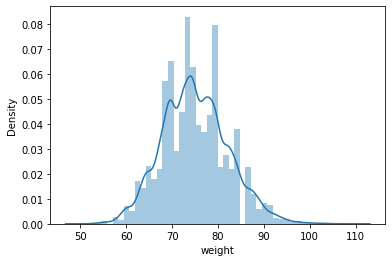

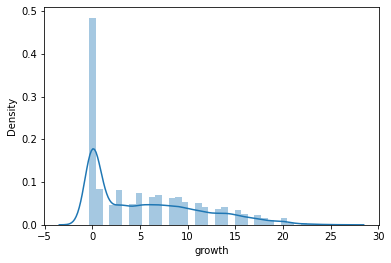

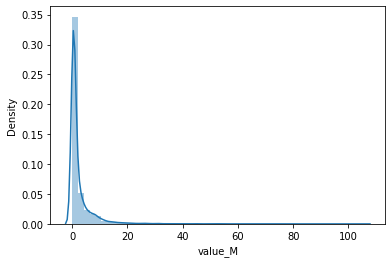

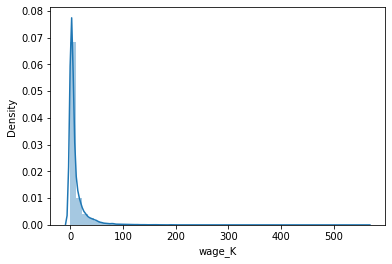

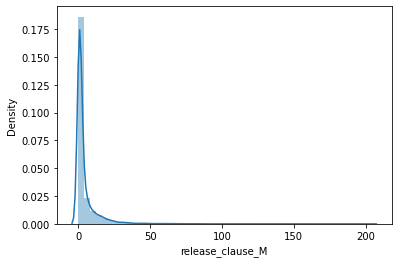

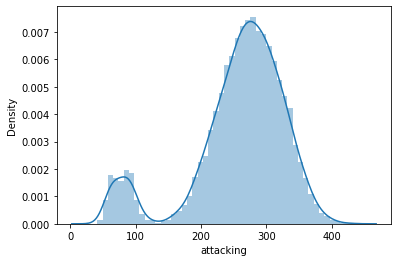

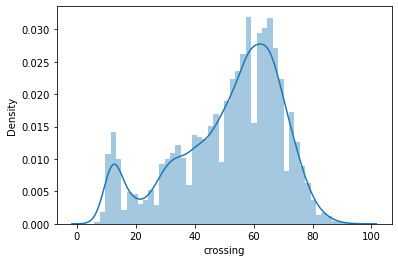

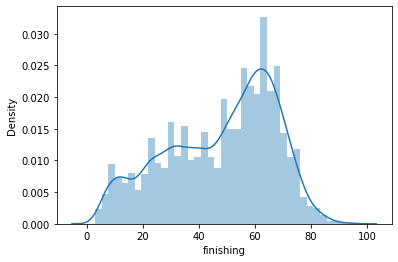

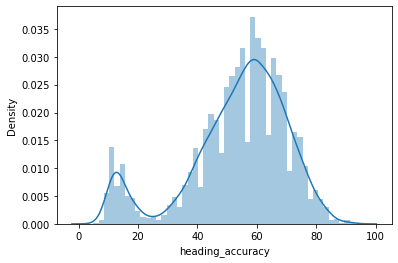

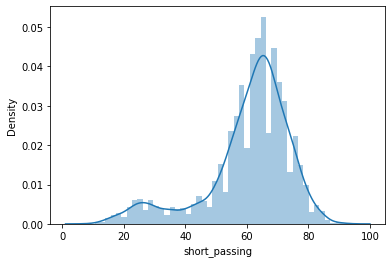

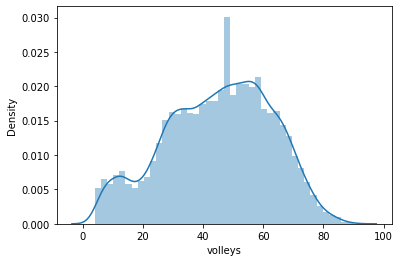

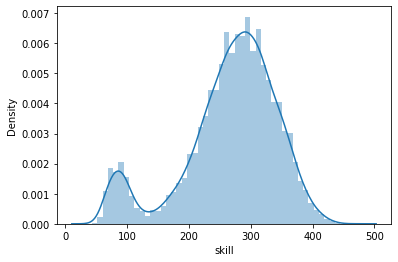

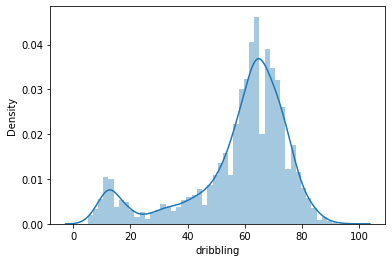

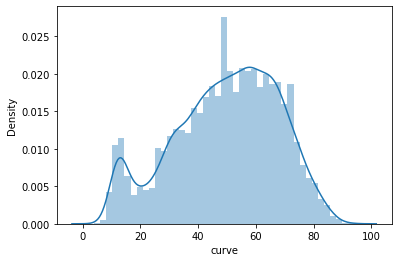

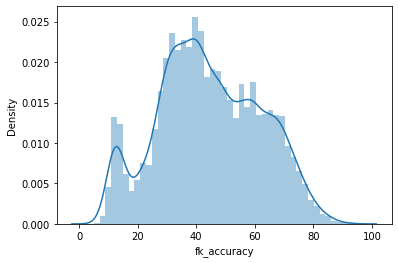

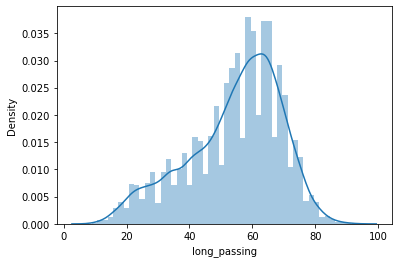

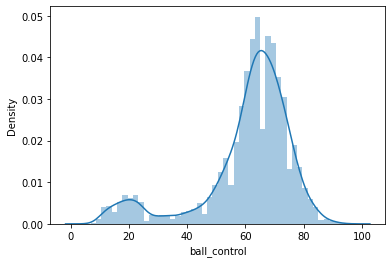

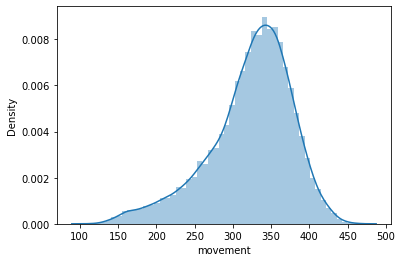

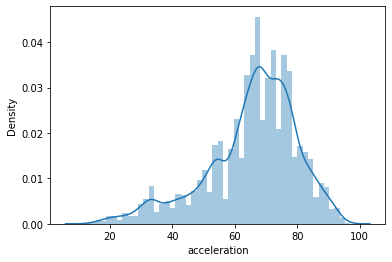

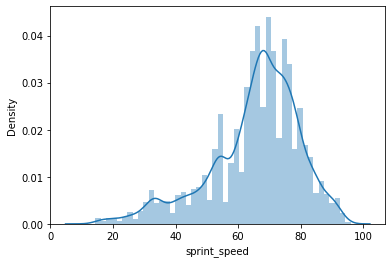

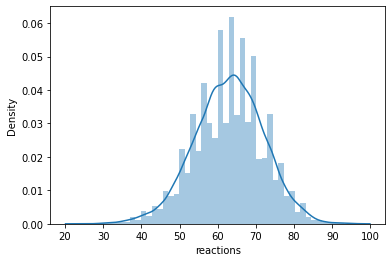

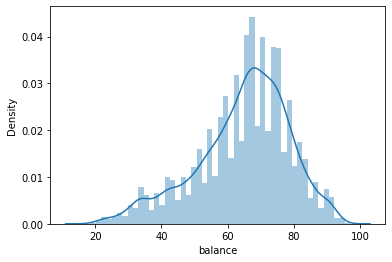

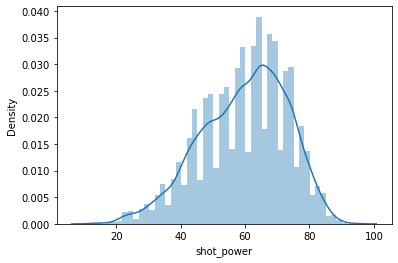

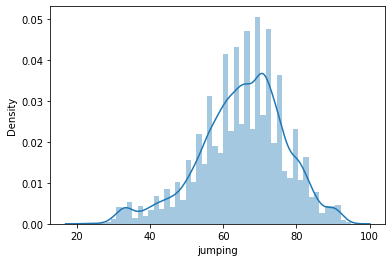

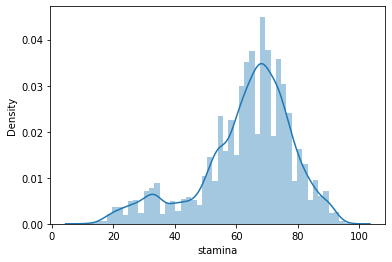

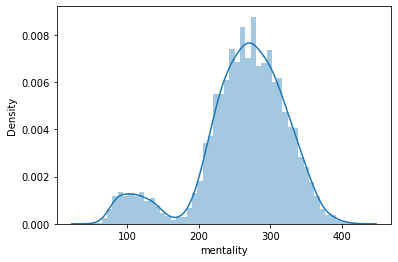

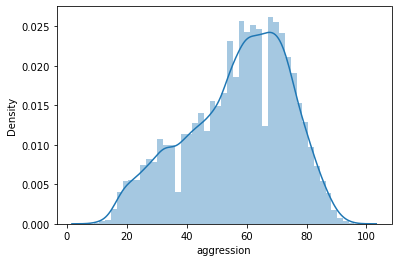

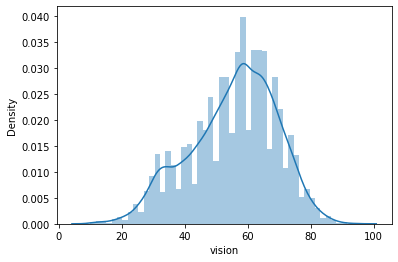

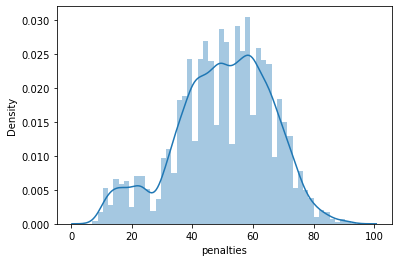

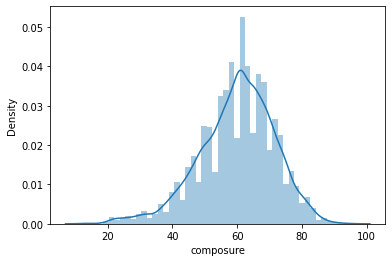

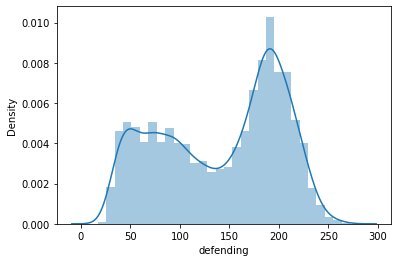

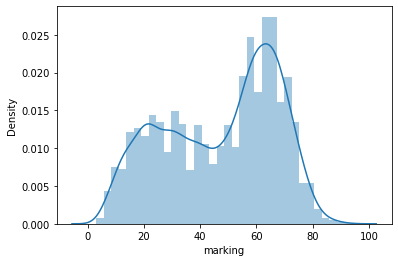

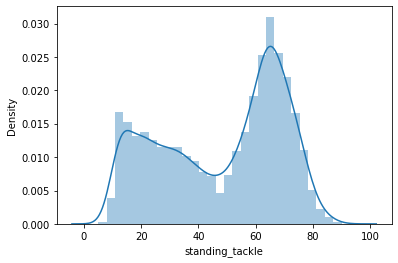

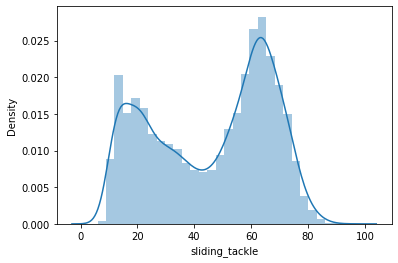

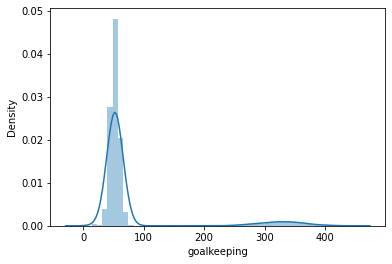

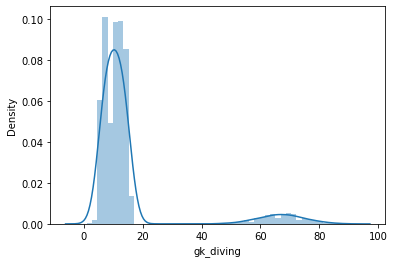

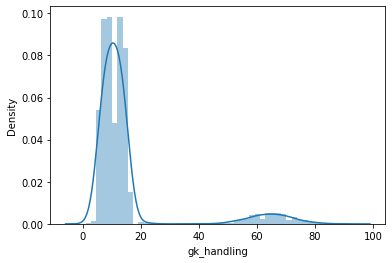

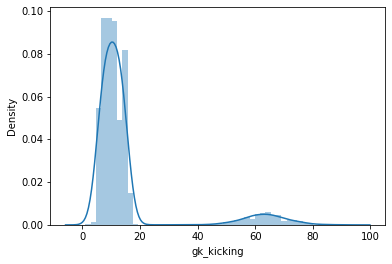

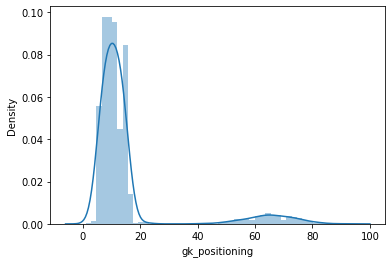

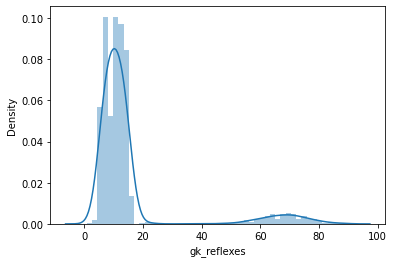

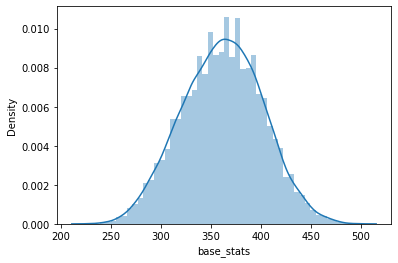

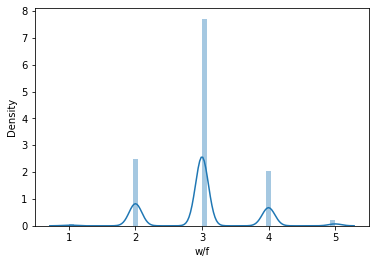

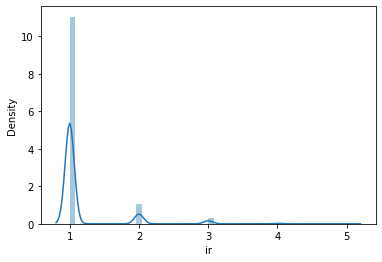

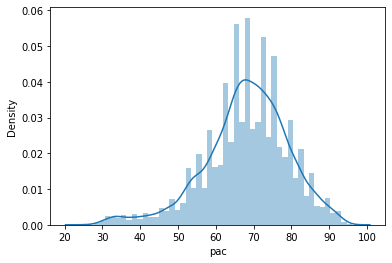

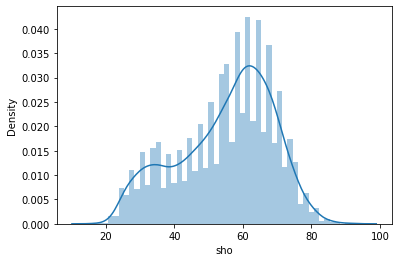

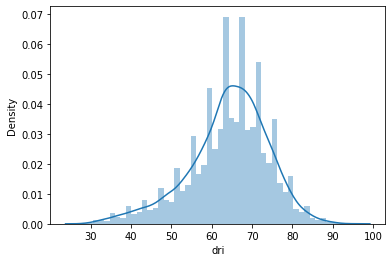

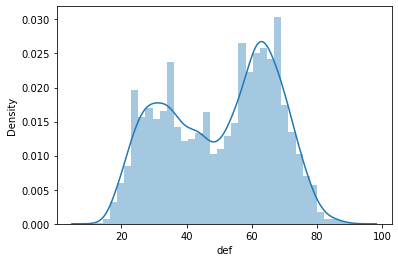

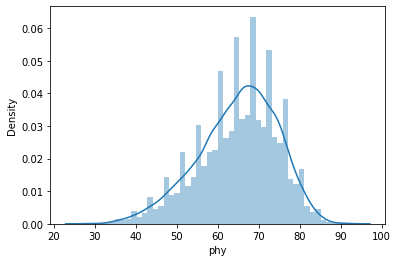

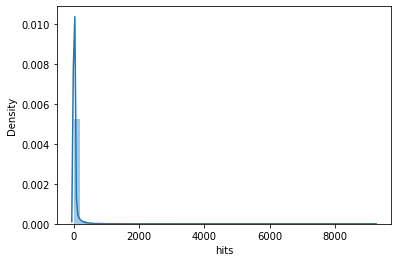

In [37]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

**Correlation of numerical columns:**

Checking correlation of numerical data:

In [38]:
correlations_matrix = data.corr()  
correlations_matrix

age       ova       bov       pot    height    weight  \
age               1.000000  0.517099  0.456734 -0.237619  0.061240  0.258682   
ova               0.517099  1.000000  0.985877  0.592268  0.027395  0.151834   
bov               0.456734  0.985877  1.000000  0.628323  0.020598  0.132560   
pot              -0.237619  0.592268  0.628323  1.000000  0.003989 -0.039809   
height            0.061240  0.027395  0.020598  0.003989  1.000000  0.464253   
weight            0.258682  0.151834  0.132560 -0.039809  0.464253  1.000000   
growth           -0.850204 -0.595585 -0.542890  0.294499 -0.028515 -0.219772   
value_M           0.095981  0.631679  0.640818  0.563570  0.007990  0.040257   
wage_K            0.200851  0.592925  0.592453  0.462235  0.016338  0.068695   
release_clause_M  0.075386  0.597617  0.608384  0.549201  0.008431  0.034724   
...                    ...       ...       ...       ...       ...       ...   
w/f               0.081895  0.201386  0.212576  0.137861 -0.117819 -0.119623   
sm                0.070940  0.345421  0.373599  0.241020 -0.303536 -0.349560   
ir                0.403141  0.474492  0.455974  0.293444  0.033130  0.121790   
pac              -0.177291  0.201319  0.212889  0.259294 -0.257268 -0.339467   
sho               0.309438  0.487060  0.478573  0.244481 -0.064007  0.009329   
pas               0.396082  0.699229  0.689975  0.395773 -0.148175 -0.099561   
dri               0.241027  0.643427  0.640746  0.445004 -0.208145 -0.207594   
def               0.223184  0.344906  0.349906  0.170562  0.041718  0.104569   
phy               0.436462  0.543354  0.535579  0.159959  0.247421  0.536846   
hits             -0.079690  0.239555  0.255477  0.347990 -0.001919 -0.020747   

                    growth   value_M    wage_K  release_clause_M  attacking  \
age              -0.850204  0.095981  0.200851          0.075386   0.183954   
ova              -0.595585  0.631679  0.592925          0.597617   0.431238   
bov              -0.542890  0.640818  0.592453          0.608384   0.464329   
pot               0.294499  0.563570  0.462235          0.549201   0.233866   
height           -0.028515  0.007990  0.016338          0.008431  -0.290714   
weight           -0.219772  0.040257  0.068695          0.034724  -0.258559   
growth            1.000000 -0.187347 -0.242411         -0.161274  -0.278316   
value_M          -0.187347  1.000000  0.822728          0.979295   0.289886   
wage_K           -0.242411  0.822728  1.000000          0.798432   0.288541   
release_clause_M -0.161274  0.979295  0.798432          1.000000   0.269036   
...                    ...       ...       ...               ...        ...   
w/f              -0.101413  0.151324  0.137249          0.141933   0.355232   
sm               -0.169399  0.278000  0.248334          0.258140   0.767408   
ir               -0.270221  0.459631  0.537731          0.427376   0.235135   
pac               0.019730  0.210809  0.122591          0.200583   0.180335   
sho              -0.333941  0.323770  0.294205          0.300981   0.351248   
pas              -0.434753  0.444484  0.419563          0.418093   0.373439   
dri              -0.319487  0.442156  0.389842          0.416343   0.381863   
def              -0.239034  0.172856  0.191576          0.167362   0.106978   
phy              -0.484974  0.266541  0.260983          0.250809   0.104102   
hits              0.062807  0.402927  0.302218          0.410376   0.131800   

                  crossing  finishing  heading_accuracy  short_passing  \
age               0.151022   0.105311          0.172793       0.176786   
ova               0.386334   0.304012          0.305553       0.492372   
bov               0.400046   0.336488          0.335677       0.533046   
pot               0.210944   0.173281          0.137199       0.318544   
height           -0.386564  -0.276907         -0.012066      -0.275387   
weight           -0.394283  -0.270512          0.090842      -0.266584   
growt

Showing correlation in a heatmat:

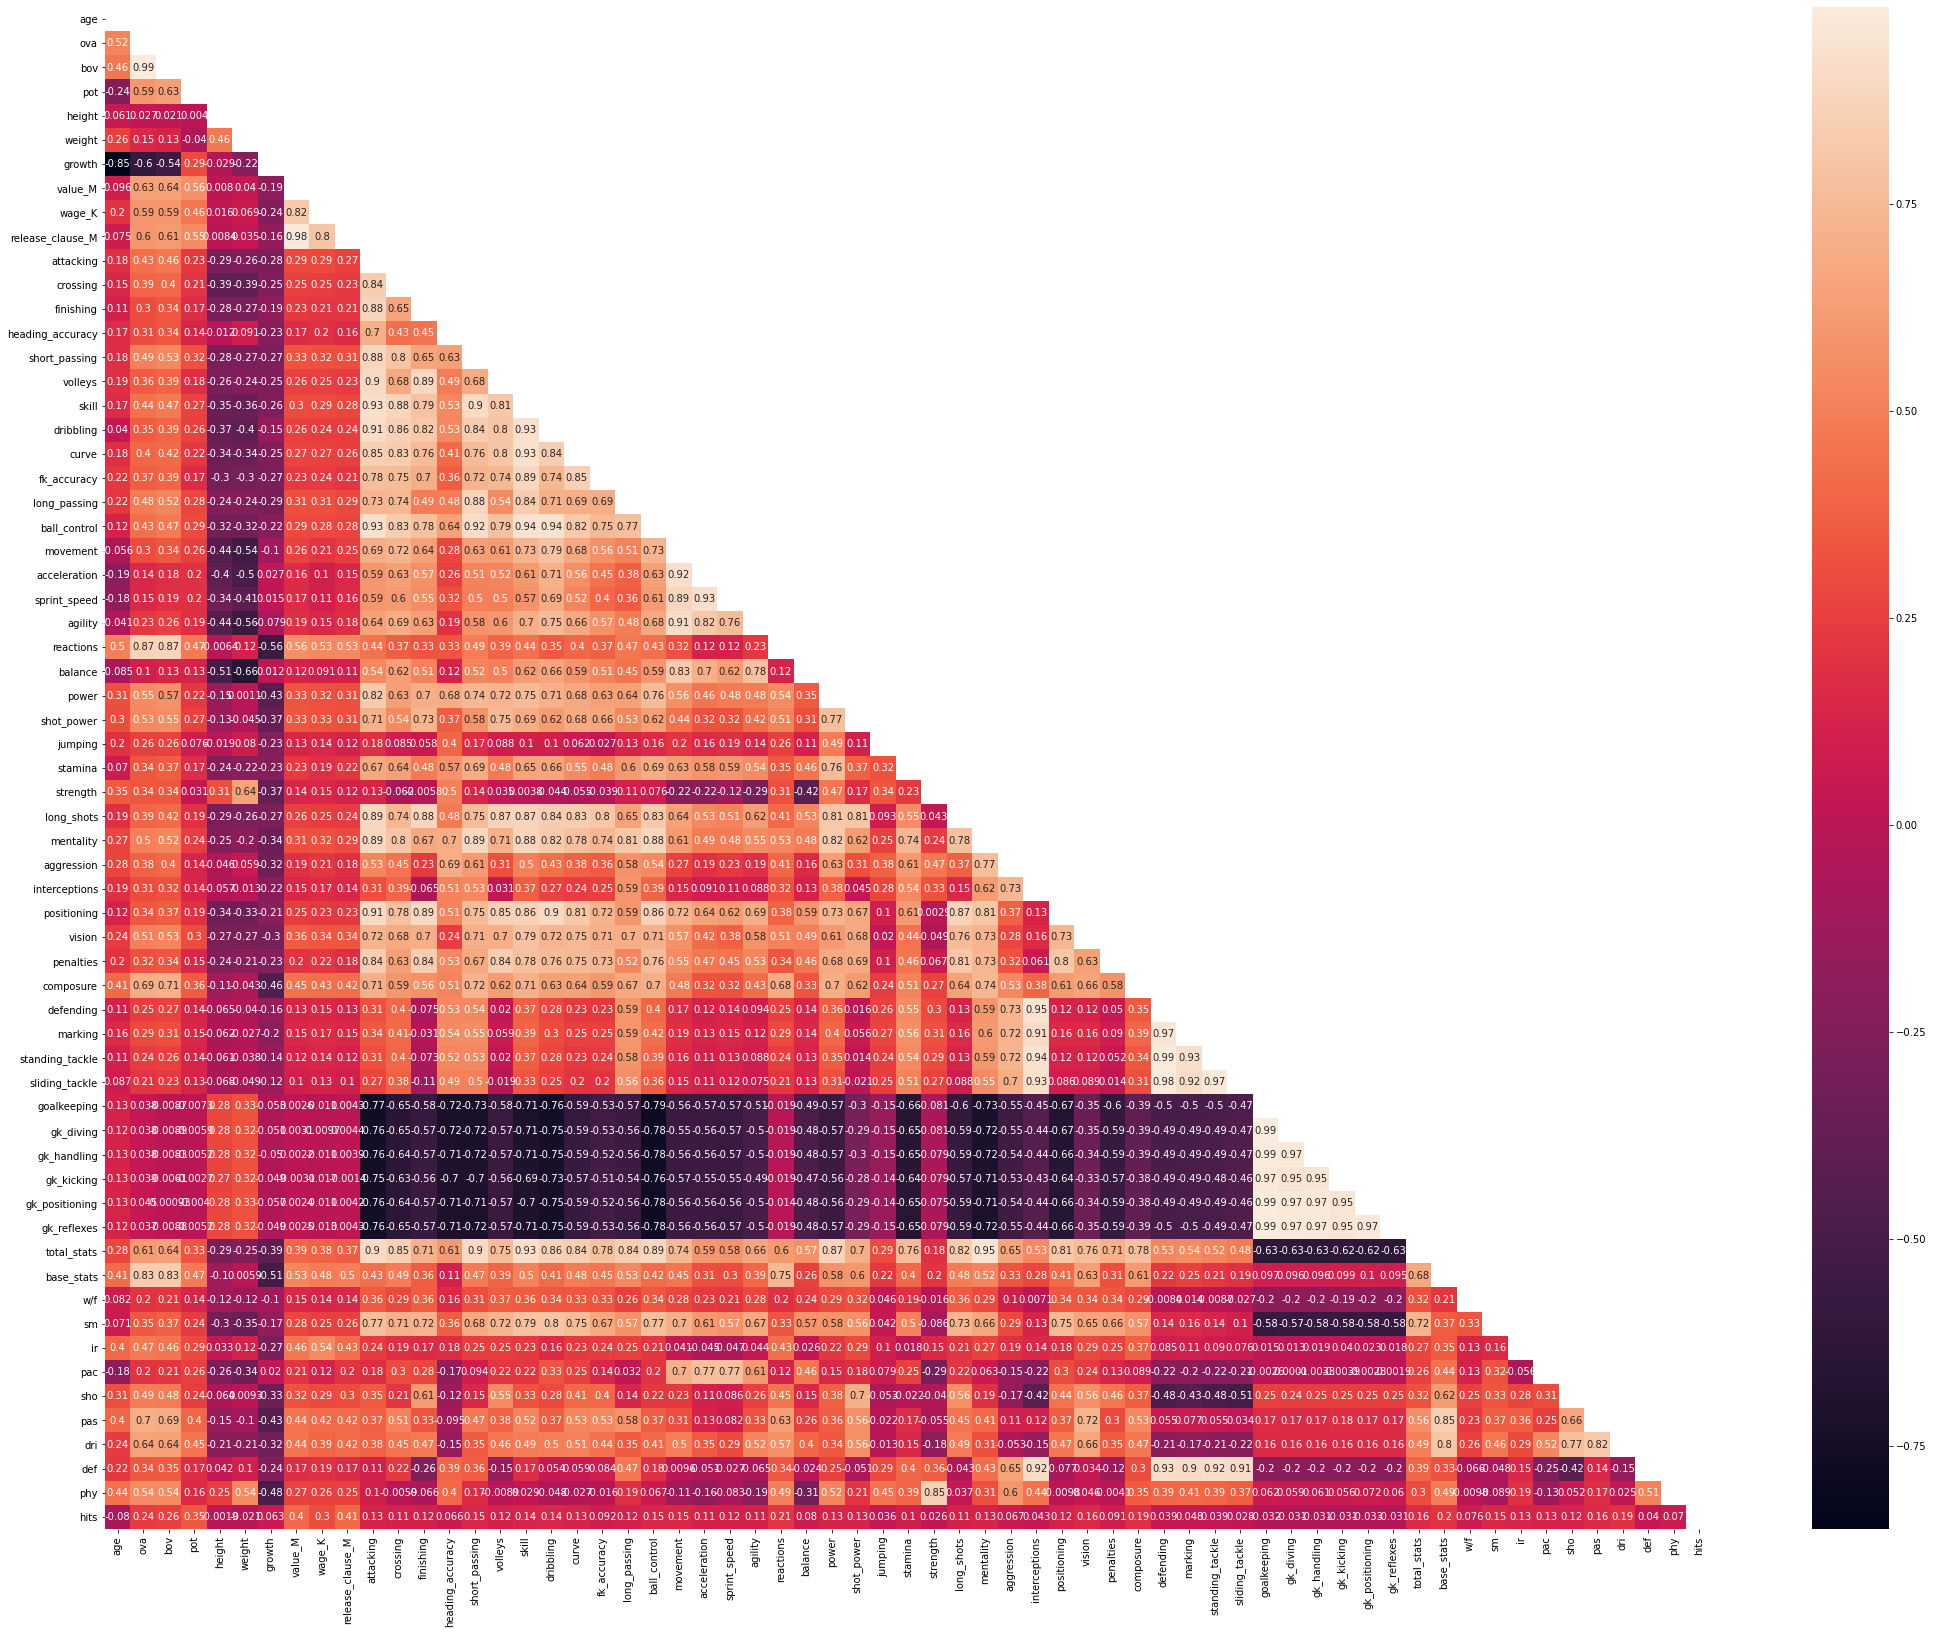

In [39]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(36, 28))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

#### Insights after first exploration
- most numerical features are not distributed normally --> normalization will be necessary
- high positive correlation of some columns: all gk-columns are highly correlated
- high negative correlation of some columns: mostly related to gk-columns
- normalizing data might be better than standardization to scale down data as there are huge value differences

Dropping all gk-columns except goalkeeping:

In [40]:
data = data.drop(columns=['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'], axis=1)

**Boxcox transformation:**

In [41]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

data, _ci = boxcox_transform(data)

**Dealing with outliers:**

Checking for outliers via boxplots:

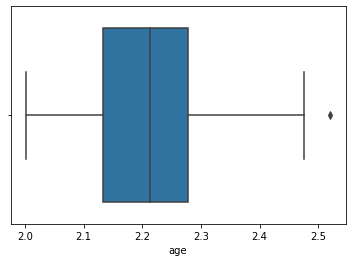

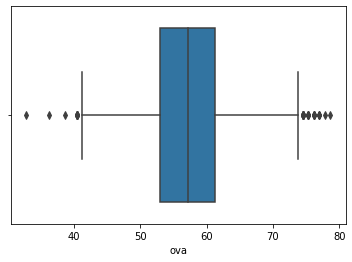

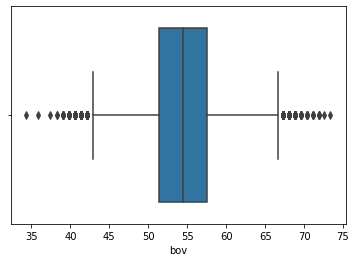

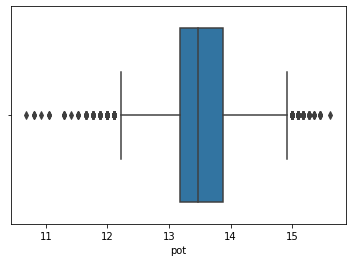

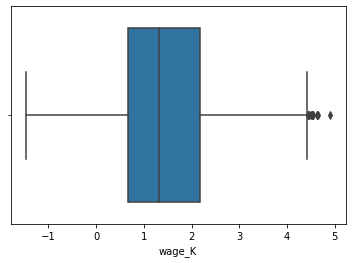

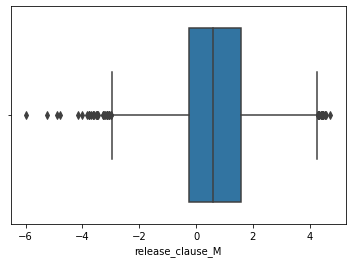

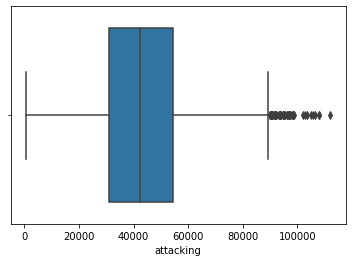

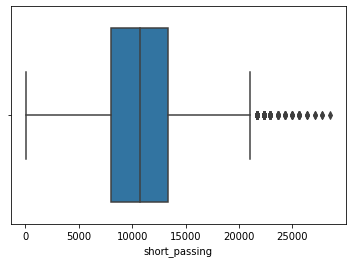

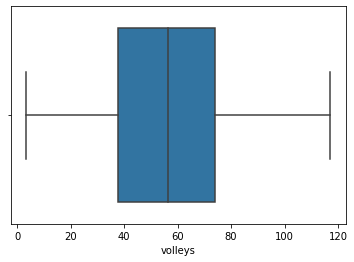

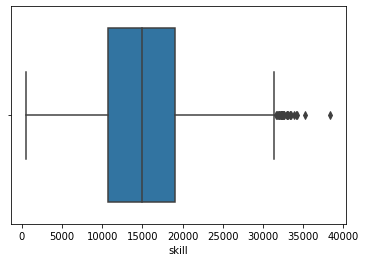

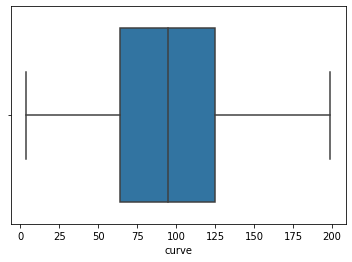

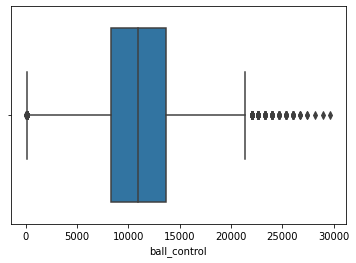

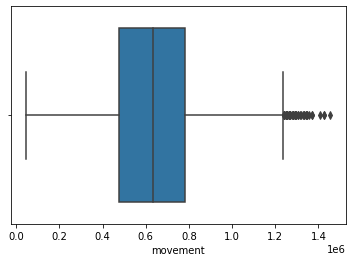

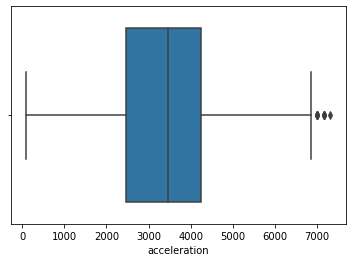

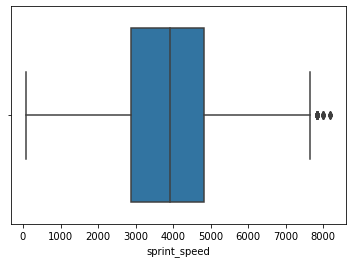

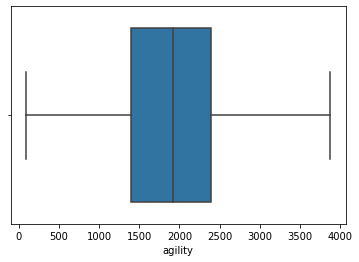

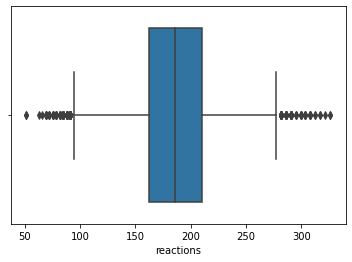

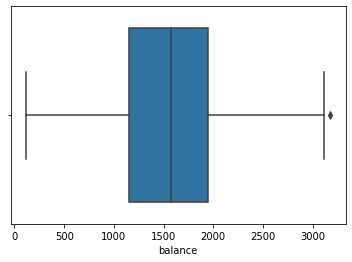

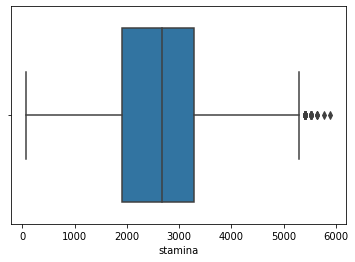

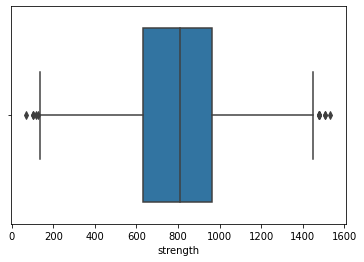

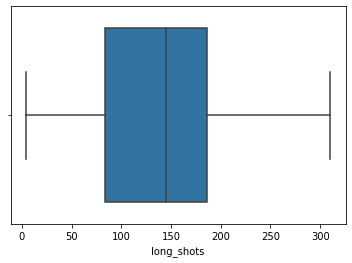

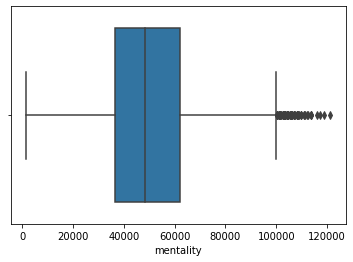

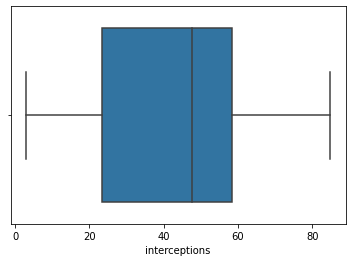

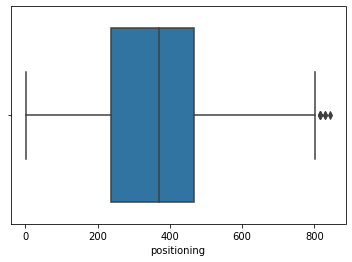

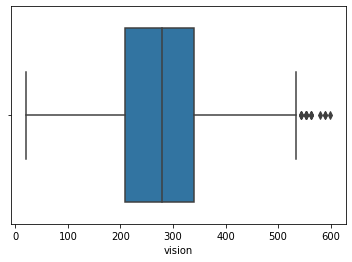

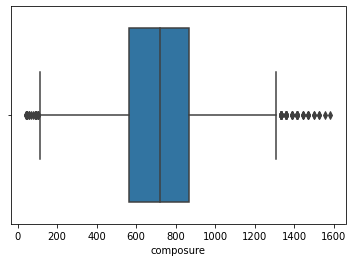

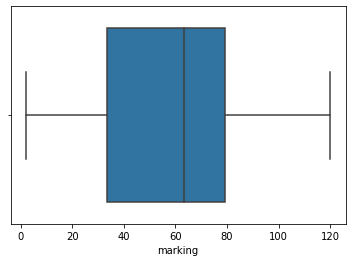

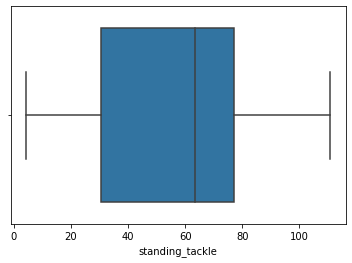

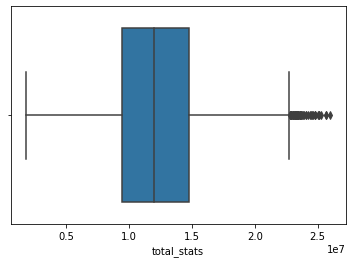

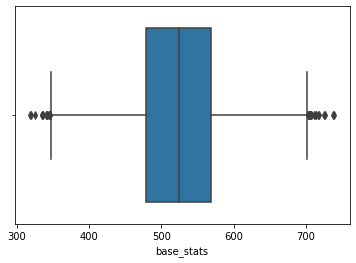

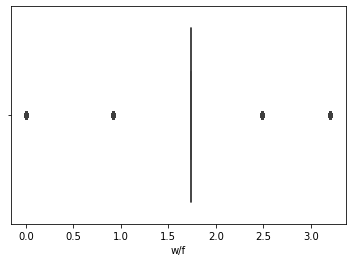

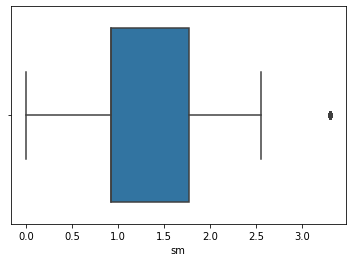

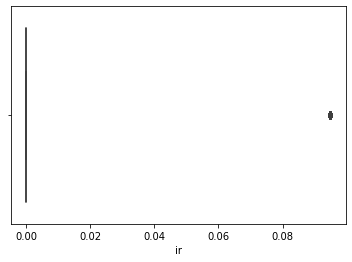

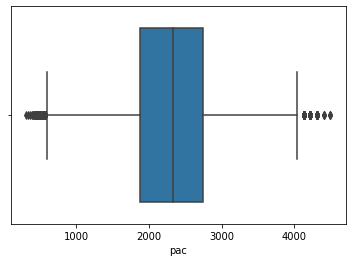

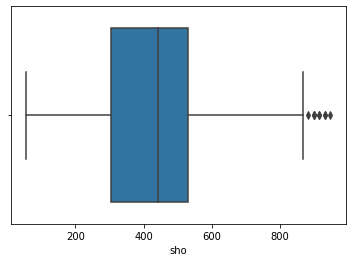

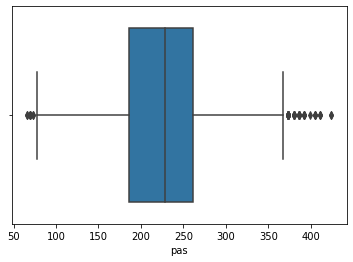

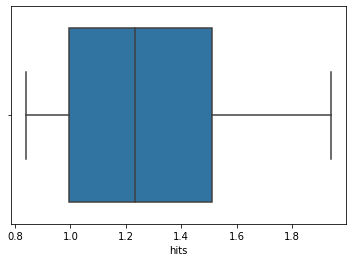

In [42]:
for col in data.select_dtypes(np.number).columns:
    sns.boxplot(data[col])
    plt.show()

Defining a funtion to cut of outliers at limits instead of removing them:

In [43]:
def cutting_outliers(data, threshold=2.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data.loc[data[column] > upper_limit, column] = upper_limit
            data.loc[data[column] < lower_limit, column] = lower_limit
    return data

In [44]:
data1 = data.copy()
data1 = cutting_outliers(data1, threshold=2.5, skip_columns=[])

**Normalization of the data:**

Splitting up categorical and numerical data into two different dataframes:

In [45]:
cat = data1.select_dtypes('object')
num = data1.select_dtypes(np.number)

num = num.drop(columns=['value_M'])

Normalizing numerical data:

In [46]:
transformer = Normalizer()
transformer.fit(num) 

Normalizer()

In [47]:
num_norm = transformer.transform(num)

num_normalized = pd.DataFrame(num_norm)
num_normalized

0         1         2             3             4   \
0      1.368544e-07  0.000003  0.000003  7.725164e-07  2.184808e-07   
1      1.436015e-07  0.000004  0.000003  8.068506e-07  9.458656e-08   
2      1.670133e-07  0.000004  0.000004  9.573663e-07  2.443967e-07   
3      3.184434e-07  0.000008  0.000008  1.941611e-06  2.130365e-07   
4      1.258013e-07  0.000004  0.000003  7.620417e-07  1.514236e-07   
5      1.888389e-07  0.000005  0.000004  1.115389e-06  2.624874e-07   
6      1.265709e-07  0.000003  0.000003  7.394094e-07  1.509497e-07   
7      1.392120e-07  0.000004  0.000004  8.153170e-07  9.088371e-08   
8      1.678286e-07  0.000005  0.000004  1.028305e-06  1.116107e-07   
9      1.193107e-07  0.000003  0.000003  7.145874e-07  1.429368e-07   
...             ...       ...       ...           ...           ...   
17115  2.365269e-07  0.000005  0.000005  1.545316e-06  3.024646e-07   
17116  3.643009e-07  0.000008  0.000008  2.434385e-06  1.173190e-06   
17117  2.162681e-07  0.000005  0.000005  1.466833e-06  2.479363e-07   
17118  2.782987e-07  0.000006  0.000006  1.743600e-06  5.412389e-07   
17119  5.303084e-07  0.000013  0.000012  3.426283e-06  1.031350e-06   
17120  2.802420e-07  0.000007  0.000007  1.712907e-06  7.885593e-07   
17121  2.066619e-07  0.000005  0.000005  1.290237e-06  1.573265e-07   
17122  2.410770e-07  0.000006  0.000005  1.517375e-06  3.996482e-07   
17123  1.963521e-07  0.000005  0.000005  1.263229e-06  3.177023e-07   
17124  2.526358e-07  0.000006  0.000006  1.677440e-06  1.923252e-07   

                 5             6             7             8         9   \
0      3.249058e-07  2.688417e-07  1.052719e-07  9.219020e-08  0.003339   
1      3.123213e-07  2.765056e-07  1.082729e-07  5.736440e-09  0.003989   
2      3.835492e-07  3.280870e-07  1.733320e-07  1.125064e-07  0.004734   
3      7.252753e-07  9.502943e-07  2.898189e-07  2.112560e-07  0.005417   
4      2.787609e-07  2.433737e-07  1.190535e-07  1.002695e-07  0.004174   
5      4.518752e-07  1.897544e-07  1.264758e-07  1.320805e-07  0.003571   
6      2.826088e-07  2.426121e-07  1.715398e-07  8.502050e-08  0.003606   
7      3.083554e-07  2.656811e-07  2.007588e-07  9.110637e-08  0.004891   
8      3.899561e-07  2.426764e-07  1.534922e-07  1.118842e-07  0.003819   
9      2.666338e-07  2.297335e-07  1.589452e-07  7.877936e-08  0.004551   
...             ...           ...           ...           ...       ...   
17115  5.705658e-07  1.008594e-06 -8.308361e-08 -2.477931e-07  0.003007   
17116  9.994055e-07  1.553445e-06 -1.279661e-07 -2.603454e-07  0.002485   
17117  5.197877e-07  9.096678e-07 -1.111076e-08 -6.988595e-08  0.003429   
17118  7.149658e-07  9.433882e-07 -1.411851e-08 -1.410503e-07  0.003818   
17119  1.392854e-06  1.587770e-06  1.711735e-07 -1.447279e-07  0.000634   
17120  7.017861e-07  3.711261e-07  8.755657e-08  2.044142e-07  0.002894   
17121  5.460718e-07  5.388407e-07  1.052815e-07 -1.341419e-07  0.003562   
17122  6.192179e-07  6.805666e-07  7.880204e-08 -1.564803e-07  0.003199   
17123  4.866039e-07  5.410198e-07  9.763146e-08 -2.276453e-08  0.002663   
17124  6.489073e-07  9.159961e-07  8.258032e-08 -2.937830e-08  0.004571   

             10        11        12        13        14        15        16  \
0      0.000030  0.000005  0.000037  0.000840  0.000004  0.001239  0.000206   
1      0.000027  0.000008  0.000040  0.001022  0.000005  0.001494  0.000188   
2      0.000041  0.000009  0.000024  0.001252  0.000007  0.001932  0.000296   
3      0.000042  0.000019  0.000086  0.002582  0.000008  0.001704  0.000407   
4      0.000028  0.000007  0.000028  0.001362  0.000005  0.001578  0.000255   
5      0.000032  0.000008  0.000029  0.000733  0.000006  0.001229  0.000247   
6      0.000030  0.000007  0.000019  0.001146  0.000005  0.001559  0.000207   
7      0.000040  0.000008  0.000037  0.001292  0.000006  0.001677  0.000227   
8      0.000035  0.000004  0.000067  0.001020  0.000005  0.000922  0.000087   
9      0.0000

Checking column names of numerical columns to replace them in normalized dataframe:

In [48]:
num.columns

Index(['age', 'ova', 'bov', 'pot', 'height', 'weight', 'growth', 'wage_K',
       'release_clause_M', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'total_stats', 'base_stats', 'w/f',
       'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits'],
      dtype='object')

Replacing column names in num_normalized:

In [49]:
cols = ['age', 'ova', 'bov', 'pot', 'height', 'weight', 'growth', 'wage_K',
       'release_clause_M', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'total_stats', 'base_stats', 'w/f',
       'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits']

num_normalized.columns = cols
num_normalized

age       ova       bov           pot        height  \
0      1.368544e-07  0.000003  0.000003  7.725164e-07  2.184808e-07   
1      1.436015e-07  0.000004  0.000003  8.068506e-07  9.458656e-08   
2      1.670133e-07  0.000004  0.000004  9.573663e-07  2.443967e-07   
3      3.184434e-07  0.000008  0.000008  1.941611e-06  2.130365e-07   
4      1.258013e-07  0.000004  0.000003  7.620417e-07  1.514236e-07   
5      1.888389e-07  0.000005  0.000004  1.115389e-06  2.624874e-07   
6      1.265709e-07  0.000003  0.000003  7.394094e-07  1.509497e-07   
7      1.392120e-07  0.000004  0.000004  8.153170e-07  9.088371e-08   
8      1.678286e-07  0.000005  0.000004  1.028305e-06  1.116107e-07   
9      1.193107e-07  0.000003  0.000003  7.145874e-07  1.429368e-07   
...             ...       ...       ...           ...           ...   
17115  2.365269e-07  0.000005  0.000005  1.545316e-06  3.024646e-07   
17116  3.643009e-07  0.000008  0.000008  2.434385e-06  1.173190e-06   
17117  2.162681e-07  0.000005  0.000005  1.466833e-06  2.479363e-07   
17118  2.782987e-07  0.000006  0.000006  1.743600e-06  5.412389e-07   
17119  5.303084e-07  0.000013  0.000012  3.426283e-06  1.031350e-06   
17120  2.802420e-07  0.000007  0.000007  1.712907e-06  7.885593e-07   
17121  2.066619e-07  0.000005  0.000005  1.290237e-06  1.573265e-07   
17122  2.410770e-07  0.000006  0.000005  1.517375e-06  3.996482e-07   
17123  1.963521e-07  0.000005  0.000005  1.263229e-06  3.177023e-07   
17124  2.526358e-07  0.000006  0.000006  1.677440e-06  1.923252e-07   

             weight        growth        wage_K  release_clause_M  attacking  \
0      3.249058e-07  2.688417e-07  1.052719e-07      9.219020e-08   0.003339   
1      3.123213e-07  2.765056e-07  1.082729e-07      5.736440e-09   0.003989   
2      3.835492e-07  3.280870e-07  1.733320e-07      1.125064e-07   0.004734   
3      7.252753e-07  9.502943e-07  2.898189e-07      2.112560e-07   0.005417   
4      2.787609e-07  2.433737e-07  1.190535e-07      1.002695e-07   0.004174   
5      4.518752e-07  1.897544e-07  1.264758e-07      1.320805e-07   0.003571   
6      2.826088e-07  2.426121e-07  1.715398e-07      8.502050e-08   0.003606   
7      3.083554e-07  2.656811e-07  2.007588e-07      9.110637e-08   0.004891   
8      3.899561e-07  2.426764e-07  1.534922e-07      1.118842e-07   0.003819   
9      2.666338e-07  2.297335e-07  1.589452e-07      7.877936e-08   0.004551   
...             ...           ...           ...               ...        ...   
17115  5.705658e-07  1.008594e-06 -8.308361e-08     -2.477931e-07   0.003007   
17116  9.994055e-07  1.553445e-06 -1.279661e-07     -2.603454e-07   0.002485   
17117  5.197877e-07  9.096678e-07 -1.111076e-08     -6.988595e-08   0.003429   
17118  7.149658e-07  9.433882e-07 -1.411851e-08     -1.410503e-07   0.003818   
17119  1.392854e-06  1.587770e-06  1.711735e-07     -1.447279e-07   0.000634   
17120  7.017861e-07  3.711261e-07  8.755657e-08      2.044142e-07   0.002894   
17121  5.460718e-07  5.388407e-07  1.052815e-07     -1.341419e-07   0.003562   
17122  6.192179e-07  6.805666e-07  7.880204e-08     -1.564803e-07   0.003199   
17123  4.866039e-07  5.410198e-07  9.763146e-08     -2.276453e-08   0.002663   
17124  6.489073e-07  9.159961e-07  8.258032e-08     -2.937830e-08   0.004571   

       crossing  finishing  heading_accuracy  short_passing   volleys  \
0      0.000030   0.000005          0.000037       0.000840  0.000004   
1      0.000027   0.000008          0.000040       0.001022  0.000005   
2      0.000041   0.000009          0.000024       0.001252  0.000007   
3      0.000042   0.000019          0.000086       0.002582  0.000008   
4      0.000028   0.000007          0.000028       0.001362  0.000005   
5      0.000032   0.000008          0.000029       0.000733  0.000006   
6      0.000030   0.000007          0.000019       0.001146  0.000005   
7      0.000040   0.000008          0.000037       0.001292  0.000006   
8      0.000035   0.000004         

**Dealing with categorical columns:**

Checking out unique values + value counts for categorical columns:

In [50]:
for column in cat.columns:
    print(column, cat[column].value_counts())

nationality England                    1707
Germany                    1154
Spain                      1121
France                      990
Brazil                      857
Argentina                   778
Italy                       565
Netherlands                 475
Portugal                    365
United States               358
                           ... 
Tanzania                      1
Andorra                       1
Gibraltar                     1
Malta                         1
Macau                         1
Suriname                      1
Singapore                     1
São Tomé &amp; Príncipe       1
Aruba                         1
Eritrea                       1
Name: nationality, Length: 167, dtype: int64
club Bolton Wanderers           45
Chelsea                    45
Manchester United          45
Sunderland                 43
Arsenal                    43
Everton                    43
Aston Villa                43
Wolverhampton Wanderers    43
AS Monaco                 

--> dropping columns with too many values

In [51]:
cat = cat.drop(['club', 'nationality','joined_year'], axis=1)

Encoding categorical columns:

In [52]:
cat = pd.get_dummies(cat, drop_first=True)
cat

bp_CB  bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
0          0       0      0      0      0      0      0      0       1      0   
1          0       0      0      1      0      0      0      0       0      0   
2          0       0      0      0      0      0      0      0       0      0   
3          0       0      0      0      0      0      0      0       0      0   
4          0       0      0      0      0      0      0      0       0      0   
5          0       0      0      0      0      0      0      0       0      0   
6          0       0      0      1      0      0      0      0       0      0   
7          0       0      0      0      0      0      0      0       0      0   
8          1       0      0      0      0      0      0      0       0      0   
9          0       0      0      0      0      0      0      0       0      0   
...      ...     ...    ...    ...    ...    ...    ...    ...     ...    ...   
17115      0       0      0      0      0      0      0      0       0      0   
17116      1       0      0      0      0      0      0      0       0      0   
17117      0       0      0      0      0      0      0      0       0      0   
17118      0       0      0      0      0      0      0      0       0      0   
17119      0       0      0      0      1      0      0      0       0      0   
17120      1       0      0      0      0      0      0      0       0      0   
17121      0       0      0      0      0      0      0      0       0      0   
17122      0       0      0      0      0      0      0      0       0      1   
17123      0       0      0      0      0      0      0      0       0      1   
17124      0       0      0      0      0      0      0      0       0      0   

       bp_RM  bp_RW  bp_RWB  bp_ST  foot_Right  a/w_Low  a/w_Medium  d/w_Low  \
0          0      0       0      0           0        0           1        0   
1          0      0       0      0           1        0           1        0   
2          0      0       0      0           1        0           1        1   
3          0      0       0      1           1        0           1        0   
4          0      0       0      0           1        0           0        0   
5          0      1       0      0           1        0           1        0   
6          0      0       0      0           0        0           1        0   
7          0      0       0      0           0        0           1        0   
8          0      0       0      0           1        0           1        0   
9          0      0       0      0           1        0           1        0   
...      ...    ...     ...    ...         ...      ...         ...      ...   
17115      0      0       0      0           1        0           1        0   
17116      0      0       0      0           1        0           1        0   
17117      1      0       0      0           1        0           0        0   
17118      0      0       0      1           1        0           1        0   
17119      0      0       0      0           1        0           1        0   
17120      0      0       0      0           1        0           1        0   
17121      0      0       0      0           1        0           1        0   
17122      0      0       0      0           1        0           1        0   
17123      0      0       0      0           1        0           0        0   
17124      0      0       0      1           1        0           0        0   

       d/w_Medium  
0               0  
1               1  
2               0  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  
...           ...  
17115           1  
17116           1  
17117           1  
17118           1  
17119           1  
17120           1  
17121           1  
17122           1  
17123           1  
17124           1  

[17125 rows x 19 colum

**Checking R-score for different stages of the data set:**

In [53]:
y = data['value_M']

Pre-normalized data:

In [54]:
num = sm.add_constant(num)
model_0 = sm.OLS(y,num).fit()

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                value_M   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     4987.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:28:38   Log-Likelihood:                -5001.8
No. Observations:               17125   AIC:                         1.012e+04
Df Residuals:                   17069   BIC:                         1.055e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -3.0565      0.082  

Normalized data:

In [55]:
num_normalized = sm.add_constant(num_normalized)
model_1 = sm.OLS(y,num_normalized).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                value_M   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     2628.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:28:38   Log-Likelihood:                -9911.1
No. Observations:               17125   AIC:                         1.994e+04
Df Residuals:                   17068   BIC:                         2.038e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.7278     23.756  

Encoded categorical data:

In [56]:
cat = sm.add_constant(cat)
model_3 = sm.OLS(y,cat).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                value_M   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          9.02e-259
Time:                        23:28:38   Log-Likelihood:                -28658.
No. Observations:               17125   AIC:                         5.736e+04
Df Residuals:                   17105   BIC:                         5.751e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8558      0.044     19.267      0.0

Concatenated data (num + cat):

In [57]:
X1 = pd.concat([num, cat], axis=1)

X1 = sm.add_constant(X1)
model_4 = sm.OLS(y,X1).fit()

print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                value_M   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     3738.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:28:38   Log-Likelihood:                -4923.8
No. Observations:               17125   AIC:                             9998.
Df Residuals:                   17050   BIC:                         1.058e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -3.0054      0.082  

Concatenated data (num_normalized + cat):

In [58]:
X2 = pd.concat([num_normalized, cat], axis=1)

X2 = sm.add_constant(X2)
model_5 = sm.OLS(y,X2).fit()

print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                value_M   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1948.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:28:39   Log-Likelihood:                -9853.4
No. Observations:               17125   AIC:                         1.986e+04
Df Residuals:                   17048   BIC:                         2.046e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.954e+10   2.27e+10  

**Overview of different R2-scores:** 
<br>

|	Model combinations	|	R2-score	|
|	:---------------------	|	:---------:	|
|	Pre-normalized data (num)	|	0,9410	|
|	Normalized data (num_normalized)	|	0,8960	|
|	Encoded categorical data (cat)	|	0,0720	|
|	Concatenated data (num + cat)	|	0,9420	|
|	Concatenated data (num_normalized + cat)	|	0,8970	|
|||

--> best combination for model = num + cat

Checking which columns can be dropped for model:

In [59]:
X1 = sm.add_constant(X1)
model = sm.OLS(y,X1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                value_M   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     3738.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:28:39   Log-Likelihood:                -4923.8
No. Observations:               17125   AIC:                             9998.
Df Residuals:                   17050   BIC:                         1.058e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -3.0054      0.082  

--> p-value with more than 0.2: height, weight, stamina, mentality, aggression, positioning, vision, total_stats, dri, bp_CF, bp_CM, bp_LM, bp_LW, bp_RM, bp_RW, bp_ST, foot_Right

In [60]:
X = pd.concat([num, cat], axis=1)
X = X.drop(['height','weight', 'stamina', 'mentality', 'aggression', 'positioning', 'vision', 'total_stats','dri', 'bp_CF', 'bp_CM', 'bp_LM', 'bp_LW', 'bp_RM', 'bp_RW', 'bp_ST', 'foot_Right'], axis=1)

y = data['value_M']

In [61]:
X = sm.add_constant(X)
model_X = sm.OLS(y,X).fit()

print(model_X.summary())

                            OLS Regression Results                            
Dep. Variable:                value_M   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     4856.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:28:39   Log-Likelihood:                -4927.6
No. Observations:               17125   AIC:                             9971.
Df Residuals:                   17067   BIC:                         1.042e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -3.0034      0.081  

### Modeling and model validation:

Train-test split:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [63]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

predictions = model_reg.predict(X_test)

R2 score:

In [64]:
r2 = r2_score(y_test, predictions)
print('R2 score is ', r2)

R2 score is  0.9306352468953588


In [65]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['value_M'])

Showing MSE, RMSE and MAE:

In [66]:
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print('MSE score is ', mse)
print('RMSE score is ', rmse)
print('MAE score is ', mae)

MSE score is  82.87396352662714
RMSE score is  9.103513801089507
MAE score is  3.1058040772927935


### Reporting:

In [67]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value_M'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true       pred     resid
8495    3.100   2.877541  0.222459
14905   0.550   0.594224  0.044224
9373    0.850   1.019843  0.169843
12420   4.700   4.087314  0.612686
16704   0.150   0.119954  0.030046
13515   0.700   0.543253  0.156747
8854    0.550   0.510880  0.039120
2083    0.450   0.451860  0.001860
6126    0.150   0.141255  0.008745
4626    1.100   1.401579  0.301579
...       ...        ...       ...
13719   3.500   3.125276  0.374724
5312    0.550   0.472524  0.077476
9625    0.675   0.571203  0.103797
6935    5.500   4.364770  1.135230
16351   0.400   0.419925  0.019925
9623   11.000  11.894652  0.894652
7638    0.140   0.140518  0.000518
532     1.300   1.825847  0.525847
3405   12.000  13.464254  1.464254
7953    1.000   1.175743  0.175743

[3425 rows x 3 columns]

Showing overview of statistics of results:

In [68]:
results.describe().apply(lambda x: round(x,2)).T

count  mean   std   min   25%   50%   75%     max
true   3425.0  2.83  5.79  0.00  0.42  0.90  2.64   90.00
pred   3425.0  3.09  9.16  0.02  0.42  0.93  2.39  225.73
resid  3425.0  0.71  4.11  0.00  0.03  0.09  0.43  135.73

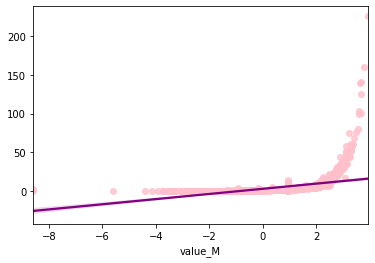

In [69]:
#showing relationship between y_test and predictions --> visualization of regression line and accuracy of the model?
sns.regplot(y_test, predictions, scatter_kws={'color' : 'pink'}, line_kws={'color' : 'purple'})
plt.show()